In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

### Random walker

In [3]:
#np.random.seed(100)
T=1; N=500*T; dt=float(T)/N; 
t1000=np.linspace(0,T,N)
N_exp=1000
W1000=np.zeros((N_exp,N))
for i in range(N_exp):
    dW=np.sqrt(dt)*np.random.randn(N)
    W1000[i][1:N]=np.cumsum(dW[1:N])
   

W_mean1000= np.mean(W1000,0)
W_var1000=np.var(W1000,0)
#print W_10
#print W_mean_10

In [4]:
T=1; N=5000*T; dt=float(T)/N; 
t=np.linspace(0,T,N+1)
N_exp=1000
x=np.zeros((N_exp,N))
#N=number of steps in a single sim, N_exp=no. of times expt is repeated.

rand_kick=np.random.randn(N_exp, N)
D=1.0 # diffusion constant
dx=np.sqrt(2*D*dt)*rand_kick
x=np.cumsum(dx,axis=1)
x=np.insert(x,0,0,axis=1) #inserting zeros in first column becoz every walker starts with zero
x_mean=np.mean(x,axis=0)
x_var=np.var(x,axis=0)


In [ ]:
#print x_mean
print LA.norm(x_mean-0.0, np.inf)
print LA.norm(x_var-t, np.inf)

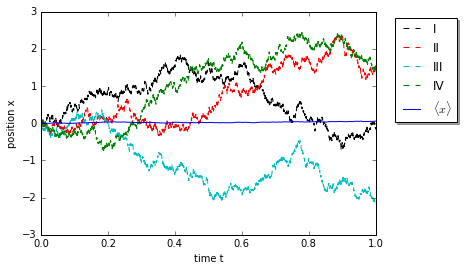

In [5]:
plt.ylabel("position x")
plt.xlabel("time t")
plt.plot(t,x[0], 'k--', label="I")
plt.plot(t,x[1], 'r--',label="II")
plt.plot(t,x[2], 'c--',label="III")
plt.plot(t,x[3], 'g--',label="IV")
plt.plot(t,x_mean, 'b', label=r"$\langle x \rangle$")
plt.legend(loc='best')


art=[]
lgd=plt.legend(loc=9, bbox_to_anchor=(1.15, 1.0), ncol=1, shadow=True)
art.append(lgd)
#plt.savefig("x_mean.eps", additional_artists=art,bbox_inches="tight")


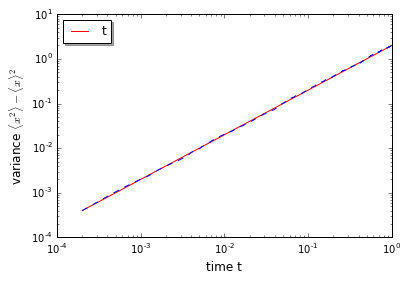

In [6]:
plt.ylabel(r"variance $\langle x^2 \rangle - \langle x \rangle^2$", fontsize=12)
plt.xlabel("time t",fontsize=12)
plt.loglog(t, 2.0*t,'r', label="t")
plt.loglog(t,x_var, 'b--')
plt.legend(loc='upper left', shadow=True)
#plt.savefig("x_var.eps")

<s> The mean of position is not really trustworthy. It doesn't nicely flutuates around 0. It's as if I am looking at the individual realization. The variance is nice, but not the mean. What is the coeffiecient? average of x^2 = 2 D t.Find D here. </s>

https://github.com/alu042/SDE-higham


### Solution of tired walker

In [7]:
T=10; N=100*T; dt=float(T)/N; 
t=np.linspace(0,T,N)

x=np.zeros(N)
x[0]=1.0
#N=number of steps in a single sim, N_exp=no. of times expt is repeated.
omega=1.0
for i in range(N-1):
    x[i+1]=x[i]*(1-omega*dt)    

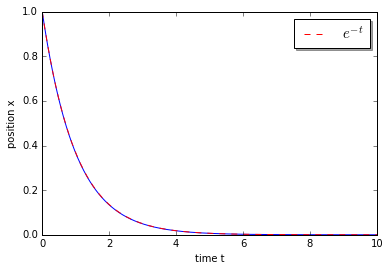

In [8]:
plt.plot(t,x, 'b')
plt.plot(t, np.exp(-t), 'r--', label=r"$e^{-t}$")
plt.legend(fontsize=15, shadow=True)
plt.ylabel("position x")
plt.xlabel("time t")
#plt.savefig("tired_walker.eps")

### Euler-Maruyama method

https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method

In [2]:
T=25; N=100*T; dt=float(T)/N; 
omega=1.0
D=10.0 # diffusion constant
t=np.linspace(0,T,N)

N_exp=1000
x=5*np.ones((N_exp,N))

#N=number of steps in a single sim, N_exp=no. of times expt is repeated.

rand_kick=np.random.randn(N_exp, N-1)

dx_random=np.sqrt(2*D*dt)*rand_kick


for j in range(N_exp):
    for i in range(N-1):
        x[j][i+1]=x[j][i]*(1-omega*dt) + dx_random[j][i]
        
#print x
x_mean_constant=np.mean(x,axis=0)
x_var_constant=np.mean(x**2,axis=0) #note that it's not variance, but second raw moment
print "x_mean"
#print x_mean
print "x_var"
#print x_var

x_mean
x_var


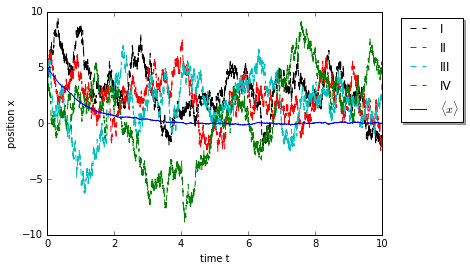

In [10]:
plt.ylabel("position x")
plt.xlabel("time t")
plt.plot(t,x[0], 'k--', label="I")
plt.plot(t,x[1], 'r--',label="II")
plt.plot(t,x[2], 'c--',label="III")
plt.plot(t,x[3], 'g--',label="IV")
plt.plot(t,x_mean_constant, 'b', label=r"$\langle x \rangle$")
plt.legend(loc='best')


art=[]
lgd=plt.legend(loc=9, bbox_to_anchor=(1.15, 1.0), ncol=1, shadow=True)
art.append(lgd)
#plt.savefig("x_brown_realization.eps", additional_artists=art,bbox_inches="tight")

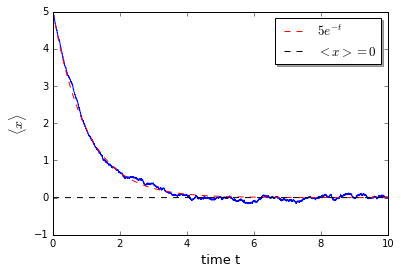

In [11]:
plt.ylabel(r"$\langle x \rangle$", fontsize=14)
plt.xlabel('time t', fontsize=13)
plt.plot(t,x_mean_constant, 'b')
plt.plot(t, 5*np.exp(-t), "r--", label=r"$5e^{-t}$")
plt.plot(t, np.zeros(len(t)), "k--", label=r"$<x>=0$")
plt.legend(fontsize=13, shadow=True)
#plt.savefig("x_brown_mean.eps")

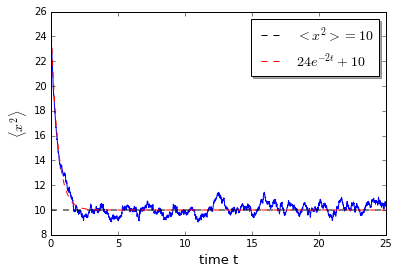

In [3]:
def fn(t):
    D=10.0
    omega=0.5
    return 25*np.exp(-2*t)+ D*(1- np.exp(-2*t) )

plt.ylabel(r"$\langle x^2 \rangle$", fontsize=14)
plt.xlabel('time t', fontsize=13)
plt.plot(t,x_var_constant, 'b')
plt.plot(t,10*np.ones(len(t)), 'k--', label=r'$<x^2>=10$')
plt.plot(t, fn(t), 'r--', label=r'$24e^{-2t}+ 10$')
plt.legend(fontsize=14, shadow=True)
#plt.savefig("x2_brown.eps")

### Linear ramp k(t)=a t

In [4]:
def protocol(tf):
    T1=10; N=100*T1; dt=float(T1)/N; 
    a=1.0
    kappa1=a*np.ones(N)
    t1=np.linspace(0,T1,N)
    #tf=5
    T2=T1+tf; N=100*(T2-T1); dt=float(T2-T1)/N; 
    t2=np.linspace(T1,T2,N)

    kappa2=np.zeros(N)
    for i in range(N):
        kappa2[i]=1.0+ (t2[i]-T1)/tf

    kappa_c=np.append(kappa1,kappa2)
    t_c=np.append(t1,t2)

    t_relax=10
    T3=T2+t_relax; N=100*(T3-T2); dt=float(T3-T2)/N; 
    t3=np.linspace(T2,T3,N)

    kappa3=kappa2[-1]*np.ones(N)

    kappa_cc=np.append(kappa_c,kappa3)
    t_cc=np.append(t_c,t3)
    return t_cc,kappa_cc

In [5]:
t_1,kappa_1=protocol(1)
gamma=1.0
omega=kappa_1/gamma
D=10.0 # diffusion constant
N_exp=1000
N=len(t_1)
x=5*np.ones((N_exp,N))

#N=number of steps in a single sim, N_exp=no. of times expt is repeated.

rand_kick=np.random.randn(N_exp, N-1)

dx_random=np.sqrt(2*D*dt)*rand_kick


for j in range(N_exp):
    for i in range(N-1):
        x[j][i+1]=x[j][i]*(1-omega[i]*dt) + dx_random[j][i]
        
#print x
x_mean_1=np.mean(x,axis=0)
x_var_1=np.mean(x**2,axis=0)#second raw moment, not variance
print "x_mean"
#print x_mean
print "x_var"
#print x_var

x_mean
x_var


In [74]:
len(t_10), len(x_mean_10)

(3000, 3000)

In [42]:
t_1,kappa_1=protocol(1)
t_5,kappa_5=protocol(5)
t_10,kappa_10=protocol(10)

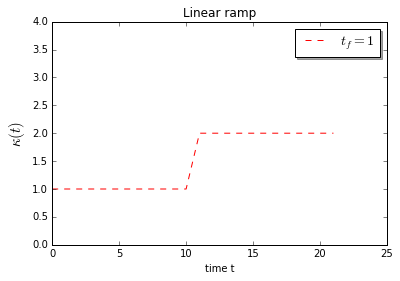

In [6]:
plt.title("Linear ramp")
plt.ylabel(r"$\kappa(t)$", fontsize=15)
plt.xlabel("time t")
plt.ylim(0.0,4)
#plt.plot(t_10,np.ones(len(t_10)),'k-')
#plt.plot(t_10,2*np.ones(len(t_10)),'k-')
plt.plot(t_1,kappa_1,'r--', label="$t_f=1$")
#plt.plot(t_5,kappa_5,'b--', label="$t_f=5$")
#plt.plot(t_10,kappa_10,'g--', label="$t_f=10$")
plt.legend(shadow=True, fontsize=14)
plt.savefig("ramp_protocol.eps")

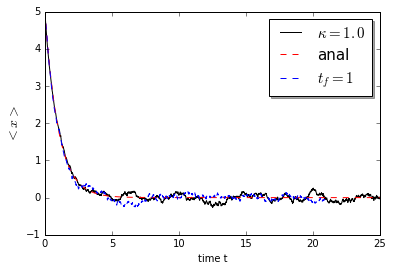

In [14]:
plt.ylabel(r"$<x>$", fontsize=14)
plt.xlabel("time t")
plt.plot(t,x_mean_constant, 'k', label="$\kappa=1.0$")
plt.plot(t,5*np.exp(-t), 'r--', label="anal")
#plt.plot(t_10,x_mean_10, 'g--', label="$t_f=10$")
#plt.plot(t_5,x_mean_5, 'r--', label="$t_f=5$")
plt.plot(t_1,x_mean_1, 'b--', label="$t_f=1$")
#plt.plot(t_10,10*np.zeros(len(t_10)), 'k--',label='$<x>=0$')
#plt.plot(t,5*np.exp(-5*t**2), 'r--', label='$5e^{-5t^2}$')
plt.legend(shadow=True, fontsize=15)
plt.savefig("ramp_mean.eps")

In [22]:
def fn(t):
    D=10.0
    omega=1.0
    return 25*np.exp(-2*omega*t)+ (D/omega)*(1- np.exp(-2*omega*t) )
def fn1(t):
    D=10.0
    omega=2.0
    return 25*np.exp(-2*omega*(t-11))+ (D/omega)*(1- np.exp(-2*omega*(t-11))) 

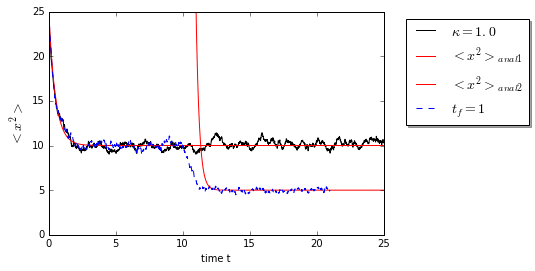

In [25]:
plt.ylabel(r"$<x^2>$", fontsize=14)
plt.xlabel("time t")
plt.ylim(0,25)
plt.plot(t,x_var_constant, 'k', label="$\kappa=1.0$")
plt.plot(t,fn(t), 'r', label="$<x^2>_{anal1}$")
plt.plot(t,fn1(t), 'r', label="$<x^2>_{anal2}$")
#plt.plot(t_10,x_var_10, 'g--', label="$t_f=10$")
#plt.plot(t_5,x_var_5, 'r--', label="$t_f=5$")
plt.plot(t_1,x_var_1, 'b--', label="$t_f=1$")
#plt.plot(t,x_var_mediumk, 'c', label="$\kappa=t$")
#plt.plot(t,x_var_highk, 'g', label="$\kappa=5t$")
#plt.plot(t_10,10*np.ones(len(t_10)), 'c--',label='$<x^2>=10$')
#plt.plot(t_10,5*np.ones(len(t_10)), 'k--',label='$<x^2>=5$')

art=[]
lgd=plt.legend(loc=9, bbox_to_anchor=(1.25, 1.0), ncol=1, shadow=True, fontsize=14)
art.append(lgd)
plt.savefig("ramp_sigma.eps", additional_artists=art,bbox_inches="tight")

In [ ]:
plt.ylabel(r"$<x^2>$", fontsize=14)
plt.xlabel("time t")
plt.plot(t[5000:-1],x_var_constant[5000:-1], 'b', label="$\kappa=1.0$")
plt.plot(t[5000:-1],x_var_lowk[5000:-1], 'r', label="$\kappa=0.1t$")
plt.plot(t[5000:-1],x_var_mediumk[5000:-1], 'c-', label="$\kappa=t$")
plt.plot(t[5000:-1],x_var_highk[5000:-1], 'g--', label="$\kappa=5t$")
#plt.plot(t[5000:-1],x_var_Highk[5000:-1], 'k--', label="$\kappa=10t$")
plt.plot(t,10*np.ones(len(t)), 'k--',label='$<x^2>=10$')
plt.legend(loc='best',shadow=True, fontsize=15)

In [ ]:
len(t)

In [ ]:
D/kappa[-1]

In [ ]:
kappa[-1]

In [ ]:
D